# Preparation

In [2]:
import os
import glob
import pandas as pd
import numpy as np

curfolder = os.getcwd()
print(curfolder)

mtfolder = curfolder + '/Output_TimeSeries/'
print(mtfolder)

processedfolder = curfolder + '/TS_processed/'
vidfolder = curfolder + '/Output_Videos/'

# get all the files in the folder
mtfiles = glob.glob(mtfolder + '*body.csv')
print(mtfiles)

vidfiles = glob.glob(vidfolder + '*.mp4')
print(vidfiles)

c:\Users\kadava\Documents\IterLearning_LNDW
c:\Users\kadava\Documents\IterLearning_LNDW/Output_TimeSeries/
['c:\\Users\\kadava\\Documents\\IterLearning_LNDW/Output_TimeSeries\\Donner_g_ch1_g10_compr_clean_body.csv', 'c:\\Users\\kadava\\Documents\\IterLearning_LNDW/Output_TimeSeries\\Donner_g_ch1_g11_compr_clean_body.csv', 'c:\\Users\\kadava\\Documents\\IterLearning_LNDW/Output_TimeSeries\\Donner_g_ch1_g12_compr_clean_body.csv', 'c:\\Users\\kadava\\Documents\\IterLearning_LNDW/Output_TimeSeries\\Donner_g_ch1_g13_compr_clean_body.csv', 'c:\\Users\\kadava\\Documents\\IterLearning_LNDW/Output_TimeSeries\\Donner_g_ch1_g14_compr_clean_body.csv', 'c:\\Users\\kadava\\Documents\\IterLearning_LNDW/Output_TimeSeries\\Donner_g_ch1_g15_compr_clean_body.csv', 'c:\\Users\\kadava\\Documents\\IterLearning_LNDW/Output_TimeSeries\\Donner_g_ch1_g16_compr_clean_body.csv', 'c:\\Users\\kadava\\Documents\\IterLearning_LNDW/Output_TimeSeries\\Donner_g_ch1_g17_compr_clean_body.csv', 'c:\\Users\\kadava\\Document

# Clean the data

In [23]:
mtfiles[0]

'c:\\Users\\kadava\\Documents\\IterLearning_LNDW/Output_TimeSeries\\Donner_g_ch1_g10_compr_clean_body.csv'

In [12]:
sample = pd.read_csv(mtfiles[0])
sample

# get the last part of the path in sample

fileID = os.path.basename(mtfiles[0])
print(fileID)

# replace _body.csv with ''
fileID = fileID.replace('_body.csv', '')
print(fileID)

# add fileID column to the sample
sample['fileID'] = fileID



Donner_g_ch1_g10_compr_clean_body.csv
Donner_g_ch1_g10_compr_clean


In [14]:
# in the sample, get rid of all columns that contain visibility
visibility_columns = [col for col in sample.columns if 'visibility' in col]

# get rid of all columns that contain visibility
sample = sample.drop(visibility_columns, axis=1)


# Interpolate the data

In [39]:
from IPython.display import Video
import cv2

# in vidfiles find video that has the same fileID as the sample
video = [vid for vid in vidfiles if fileID in vid][0]
print(video)

# play with cv2
import cv2

cap = cv2.VideoCapture(video)

while(cap.isOpened()):
    ret, frame = cap.read()

    if ret == True:

        cv2.imshow('Frame', frame)

        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    else:
        break




c:\Users\kadava\Documents\IterLearning_LNDW/Output_Videos\Donner_g_ch1_g10_compr_clean.mp4


: 

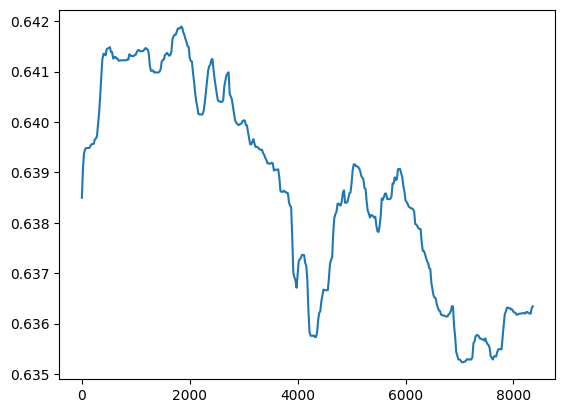

In [18]:
# plot right knee, vertical

import matplotlib.pyplot as plt

plt.plot(sample['time'], sample['Y_RIGHT_KNEE'])
plt.show()

In [15]:
cols = sample.columns
print(cols)

# put away time and fileID from cols
cols = cols.drop(['time', 'fileID'])


Index(['time', 'X_NOSE', 'Y_NOSE', 'Z_NOSE', 'X_LEFT_EYE_INNER',
       'Y_LEFT_EYE_INNER', 'Z_LEFT_EYE_INNER', 'X_LEFT_EYE', 'Y_LEFT_EYE',
       'Z_LEFT_EYE',
       ...
       'X_RIGHT_HEEL', 'Y_RIGHT_HEEL', 'Z_RIGHT_HEEL', 'X_LEFT_FOOT_INDEX',
       'Y_LEFT_FOOT_INDEX', 'Z_LEFT_FOOT_INDEX', 'X_RIGHT_FOOT_INDEX',
       'Y_RIGHT_FOOT_INDEX', 'Z_RIGHT_FOOT_INDEX', 'fileID'],
      dtype='object', length=101)


In [16]:
# loop over the cols and interpolate missing data

for col in cols:
    sample[col] = sample[col].interpolate(method='linear', x = sample['time'], limit=10)

# Smooth the data

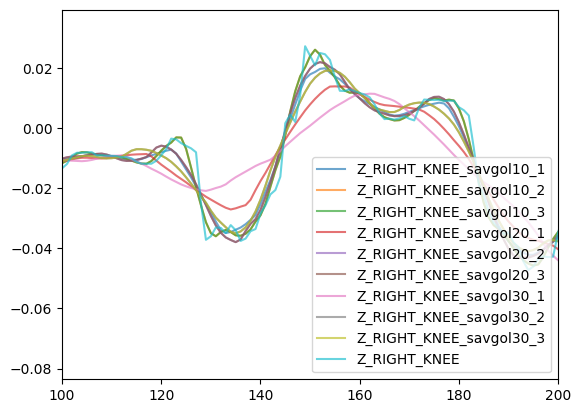

In [18]:
# smoothing with savitzky-golay filter
import scipy
import matplotlib.pyplot as plt


# list possible window
window = [10,20,30]
# list possible orders
order = [1,2,3]

# col of interest
samplecol = ['Y_RIGHT_KNEE', 'Z_RIGHT_KNEE', 'X_RIGHT_KNEE']

# iterate over handcols and apply all possible combinations of window and order, save it to new df
# prepare new df
df_smooth = pd.DataFrame()

for col in samplecol:
    for win in window:
        for ord in order:
            df_smooth[col + '_savgol' + str(win) + '_' + str(ord)] = scipy.signal.savgol_filter(sample[col], win, ord)


# make R_Hand_x from df_sample a list
LKnee_x = sample['X_RIGHT_KNEE'].tolist()
LKnee_y = sample['Y_RIGHT_KNEE'].tolist()
LKnee_z = sample['Z_RIGHT_KNEE'].tolist()


# load these values into df_smooth as a new column
df_smooth['X_RIGHT_KNEE'] = LKnee_x
df_smooth['Y_RIGHT_KNEE'] = LKnee_y
df_smooth['Z_RIGHT_KNEE'] = LKnee_z

#plot all R_Hand_x columns in one plot
colstoplot = [col for col in df_smooth.columns if 'Z_RIGHT_KNEE' in col]
for col in colstoplot:
    plt.plot(df_smooth[col], label=col, alpha=0.65)
plt.legend()
# make only timewindow 50 to 250
plt.xlim(100, 200)
plt.show()


### 15, 1 seems quite solid

# but for lower body let's try 20,1


In [19]:
# loop over the cols and interpolate missing data

for col in cols: 
    # smooth with savgol 30,3
    sample[col] = scipy.signal.savgol_filter(sample[col], 30, 3)

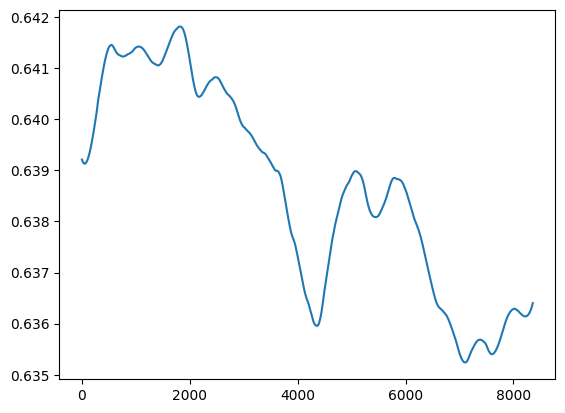

In [20]:

plt.plot(sample['time'], sample['Y_RIGHT_KNEE'])
plt.show()

# Get derivatives

In [25]:
cols

Index(['X_NOSE', 'Y_NOSE', 'Z_NOSE', 'X_LEFT_EYE_INNER', 'Y_LEFT_EYE_INNER',
       'Z_LEFT_EYE_INNER', 'X_LEFT_EYE', 'Y_LEFT_EYE', 'Z_LEFT_EYE',
       'X_LEFT_EYE_OUTER', 'Y_LEFT_EYE_OUTER', 'Z_LEFT_EYE_OUTER',
       'X_RIGHT_EYE_OUTER', 'Y_RIGHT_EYE_OUTER', 'Z_RIGHT_EYE_OUTER',
       'X_RIGHT_EYE', 'Y_RIGHT_EYE', 'Z_RIGHT_EYE', 'X_RIGHT_EYE_OUTER.1',
       'Y_RIGHT_EYE_OUTER.1', 'Z_RIGHT_EYE_OUTER.1', 'X_LEFT_EAR',
       'Y_LEFT_EAR', 'Z_LEFT_EAR', 'X_RIGHT_EAR', 'Y_RIGHT_EAR', 'Z_RIGHT_EAR',
       'X_MOUTH_LEFT', 'Y_MOUTH_LEFT', 'Z_MOUTH_LEFT', 'X_MOUTH_RIGHT',
       'Y_MOUTH_RIGHT', 'Z_MOUTH_RIGHT', 'X_LEFT_SHOULDER', 'Y_LEFT_SHOULDER',
       'Z_LEFT_SHOULDER', 'X_RIGHT_SHOULDER', 'Y_RIGHT_SHOULDER',
       'Z_RIGHT_SHOULDER', 'X_LEFT_ELBOW', 'Y_LEFT_ELBOW', 'Z_LEFT_ELBOW',
       'X_RIGHT_ELBOW', 'Y_RIGHT_ELBOW', 'Z_RIGHT_ELBOW', 'X_LEFT_WRIST',
       'Y_LEFT_WRIST', 'Z_LEFT_WRIST', 'X_RIGHT_WRIST', 'Y_RIGHT_WRIST',
       'Z_RIGHT_WRIST', 'X_LEFT_PINKY', 'Y_LEFT_PINKY', 

In [26]:
speedcols

['LEFT_SHOULDER',
 'LEFT_ELBOW',
 'MOUTH_RIGHT',
 'RIGHT_EYE',
 'RIGHT_SHOULDER',
 'LEFT_INDEX',
 'LEFT_EYE_INNER',
 'RIGHT_EYE_OUTER.1',
 'RIGHT_KNEE',
 'LEFT_EAR',
 'RIGHT_EAR',
 'LEFT_HEEL',
 'NOSE',
 'RIGHT_FOOT_INDEX',
 'RIGHT_EYE_OUTER',
 'LEFT_EYE_OUTER',
 'LEFT_FOOT_INDEX',
 'RIGHT_HEEL',
 'LEFT_PINKY',
 'LEFT_ANKLE',
 'LEFT_HIP',
 'RIGHT_INDEX',
 'RIGHT_HIP',
 'RIGHT_ANKLE',
 'LEFT_EYE',
 'LEFT_THUMB',
 'LEFT_WRIST',
 'RIGHT_WRIST',
 'RIGHT_PINKY',
 'RIGHT_THUMB',
 'MOUTH_LEFT',
 'LEFT_KNEE',
 'RIGHT_ELBOW']

In [21]:
# in cols, get rid of Y_. X_, Z_
speedcols = [col.replace('Y_', '') for col in cols]
speedcols = [col.replace('X_', '') for col in speedcols]
speedcols = [col.replace('Z_', '') for col in speedcols]

In [23]:
# keep only unique values
speedcols = list(set(speedcols))

In [30]:
sample

,time,X_NOSE,Y_NOSE,Z_NOSE,X_LEFT_EYE_INNER,Y_LEFT_EYE_INNER,Z_LEFT_EYE_INNER,X_LEFT_EYE,Y_LEFT_EYE,Z_LEFT_EYE,...,X_RIGHT_HEEL,Y_RIGHT_HEEL,Z_RIGHT_HEEL,X_LEFT_FOOT_INDEX,Y_LEFT_FOOT_INDEX,Z_LEFT_FOOT_INDEX,X_RIGHT_FOOT_INDEX,Y_RIGHT_FOOT_INDEX,Z_RIGHT_FOOT_INDEX,fileID
0,0.0,0.557449,0.291449,-0.562408,0.570874,0.282352,-0.529036,0.577596,0.282867,-0.529044,...,0.515898,0.759974,0.342972,0.626257,0.793380,0.070732,0.480089,0.789765,0.100263,Donner_g_ch1_g10_compr_clean
1,20.0,0.557457,0.291384,-0.553361,0.570850,0.282279,-0.520255,0.577344,0.282787,-0.520261,...,0.515869,0.760096,0.333391,0.626312,0.793851,0.063707,0.479813,0.789834,0.094040,Donner_g_ch1_g10_compr_clean
2,40.0,0.557463,0.291323,-0.545689,0.570826,0.282213,-0.512792,0.577117,0.282713,-0.512795,...,0.515820,0.760210,0.325694,0.626349,0.794265,0.058115,0.479570,0.789894,0.089115,Donner_g_ch1_g10_compr_clean
3,60.0,0.557468,0.291266,-0.539262,0.570803,0.282152,-0.506523,0.576914,0.282645,-0.506525,...,0.515753,0.760315,0.319735,0.626369,0.794626,0.053851,0.479357,0.789947,0.085398,Donner_g_ch1_g10_compr_clean
4,80.0,0.557471,0.291213,-0.533953,0.570781,0.282096,-0.501326,0.576733,0.282584,-0.501326,...,0.515668,0.760411,0.315367,0.626373,0.794935,0.050813,0.479173,0.789992,0.082799,Donner_g_ch1_g10_compr_clean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,8280.0,0.550695,0.296815,-0.253555,0.563030,0.287904,-0.224261,0.570988,0.288033,-0.224177,...,0.509356,0.755911,0.180479,0.625416,0.793621,-0.010790,0.482225,0.791194,0.016408,Donner_g_ch1_g10_compr_clean
415,8300.0,0.550453,0.296839,-0.254497,0.562805,0.287884,-0.225339,0.570770,0.288015,-0.225254,...,0.509349,0.755930,0.181534,0.625343,0.793582,-0.010042,0.482220,0.791176,0.017649,Donner_g_ch1_g10_compr_clean
416,8320.0,0.550183,0.296869,-0.255656,0.562558,0.287863,-0.226649,0.570535,0.287997,-0.226565,...,0.509353,0.755949,0.182818,0.625239,0.793531,-0.009197,0.482214,0.791143,0.019207,Donner_g_ch1_g10_compr_clean
417,8340.0,0.549882,0.296905,-0.257049,0.562288,0.287842,-0.228208,0.570281,0.287978,-0.228125,...,0.509368,0.755970,0.184350,0.625101,0.793467,-0.008248,0.482207,0.791095,0.021109,Donner_g_ch1_g10_compr_clean


In [35]:
for col in speedcols:
    x = sample['X_' + col]
    y = sample['Y_' + col]
    z = sample['Z_' + col]

    # calculate speed
    sample[col + '_speed'] = np.insert(np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2 + np.diff(z) ** 2), 0, 0)
    # smooth it
    sample[col + '_speed'] = scipy.signal.savgol_filter(sample[col + '_speed'], 30, 3)

In [36]:
sample

,time,X_NOSE,Y_NOSE,Z_NOSE,X_LEFT_EYE_INNER,Y_LEFT_EYE_INNER,Z_LEFT_EYE_INNER,X_LEFT_EYE,Y_LEFT_EYE,Z_LEFT_EYE,...,RIGHT_ANKLE_speed,LEFT_EYE_speed,LEFT_THUMB_speed,LEFT_WRIST_speed,RIGHT_WRIST_speed,RIGHT_PINKY_speed,RIGHT_THUMB_speed,MOUTH_LEFT_speed,LEFT_KNEE_speed,RIGHT_ELBOW_speed
0,0.0,0.557449,0.291449,-0.562408,0.570874,0.282352,-0.529036,0.577596,0.282867,-0.529044,...,0.004769,0.006819,0.001978,0.001291,0.005114,0.006050,0.005216,0.006230,0.001282,0.002398
1,20.0,0.557457,0.291384,-0.553361,0.570850,0.282279,-0.520255,0.577344,0.282787,-0.520261,...,0.004490,0.005729,0.001229,0.000690,0.004412,0.005199,0.004481,0.005228,0.001217,0.002185
2,40.0,0.557463,0.291323,-0.545689,0.570826,0.282213,-0.512792,0.577117,0.282713,-0.512795,...,0.004212,0.004820,0.000691,0.000279,0.003809,0.004467,0.003853,0.004392,0.001148,0.002000
3,60.0,0.557468,0.291266,-0.539262,0.570803,0.282152,-0.506523,0.576914,0.282645,-0.506525,...,0.003935,0.004079,0.000348,0.000044,0.003301,0.003846,0.003328,0.003711,0.001076,0.001840
4,80.0,0.557471,0.291213,-0.533953,0.570781,0.282096,-0.501326,0.576733,0.282584,-0.501326,...,0.003661,0.003494,0.000181,-0.000032,0.002881,0.003328,0.002897,0.003174,0.001003,0.001703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,8280.0,0.550695,0.296815,-0.253555,0.563030,0.287904,-0.224261,0.570988,0.288033,-0.224177,...,0.000757,0.000871,0.002066,0.002127,0.000768,0.000827,0.000803,0.000813,0.000104,0.000612
415,8300.0,0.550453,0.296839,-0.254497,0.562805,0.287884,-0.225339,0.570770,0.288015,-0.225254,...,0.000968,0.001064,0.002495,0.002564,0.000921,0.001013,0.000973,0.000991,0.000149,0.000746
416,8320.0,0.550183,0.296869,-0.255656,0.562558,0.287863,-0.226649,0.570535,0.287997,-0.226565,...,0.001216,0.001286,0.002992,0.003068,0.001090,0.001226,0.001166,0.001199,0.000209,0.000897
417,8340.0,0.549882,0.296905,-0.257049,0.562288,0.287842,-0.228208,0.570281,0.287978,-0.228125,...,0.001505,0.001541,0.003561,0.003644,0.001276,0.001468,0.001381,0.001436,0.000287,0.001065


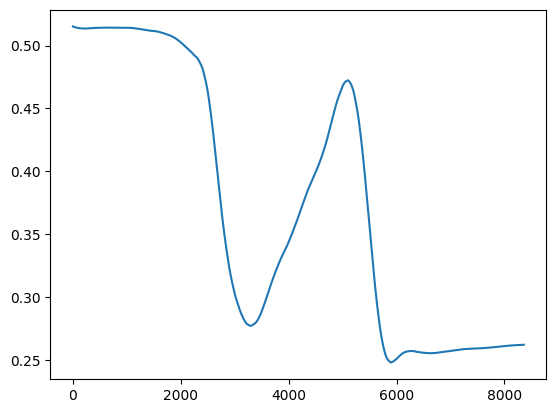

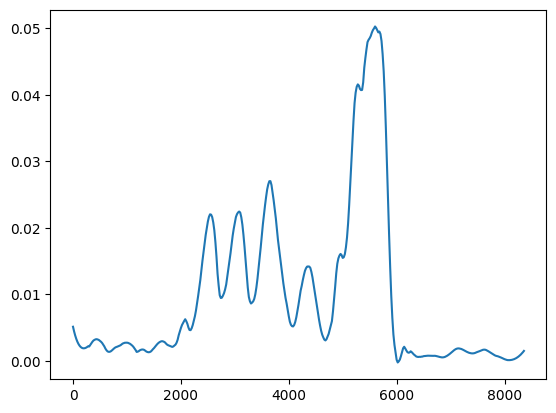

In [39]:
# plot RIGHT_WRIST_speed
plt.plot(sample['time'], sample['Y_RIGHT_WRIST'])
plt.show()
plt.plot(sample['time'], sample['RIGHT_WRIST_speed'])
plt.show()

# Plot the data

TODO
- get rid of all visibility columns
- interpolate missing data
- smooth the data - with plotting different options of the filter strength
- derive velocity  / speed & smooth
- derive acceleration & smooth
- derive jerk & smooth


